<a href="https://colab.research.google.com/github/chaserobertson/credit-fraud/blob/main/keras_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


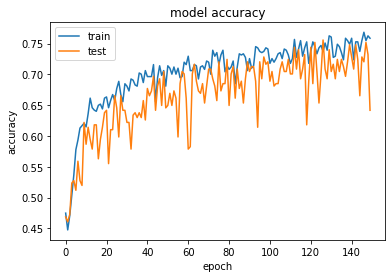

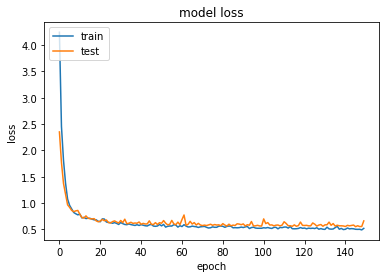

29.08139395713806


In [15]:
# !/usr/bin/env python
# Created by "Thieu" at 23:57, 14/12/2021 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Visualize training history
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy, time

t1 = time.time()
# load pima indians dataset
dataset = numpy.loadtxt("diabetes.csv", delimiter=",", skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
with tf.device('/device:GPU:0'):
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
  history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
t2 = time.time()
print(t2-t1)